### Simple Linear Regression (y= β0+ β1x1+Ɛ) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()


In [2]:
data1=pd.read_csv('/home/hemanth/Downloads/1.01. Simple linear regression.csv')

In [3]:
data1.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
data1.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [6]:
data1.isna().sum()

SAT    0
GPA    0
dtype: int64

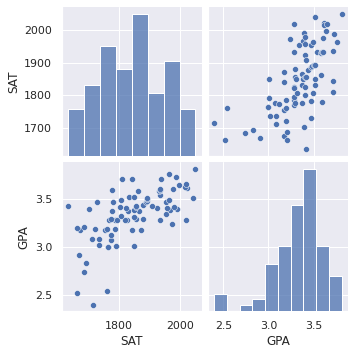

In [7]:
sns.pairplot(data1)

In [8]:
y=data1['GPA']
x1=data1['SAT']


Text(0, 0.5, 'GPA')

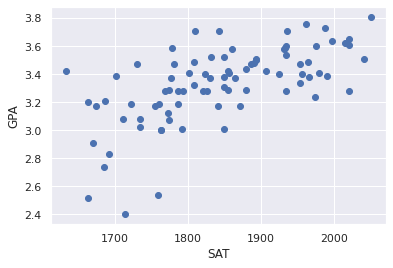

In [9]:
plt.scatter(x1,y)
plt.xlabel('SAT')
plt.ylabel('GPA')

In [10]:
# y=b0+b1x1

x=sm.add_constant(x1)

results=sm.OLS(y,x).fit()
#Contain Ordinary Least Square Regression 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           7.20e-11
Time:                        20:16:59   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

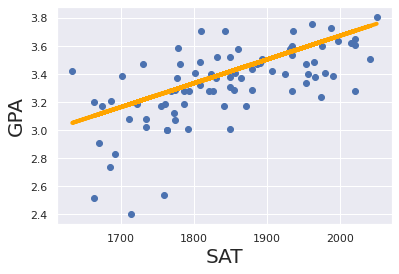

In [11]:
plt.scatter(x1,y)
yhat=0.2750+0.0017*x1 #yHat=0.275+0.0017x1 Regression Line
fig=plt.plot(x1,yhat, lw=4,c='orange',label='Regression Line')
plt.xlabel('SAT',fontsize='20')
plt.ylabel('GPA',fontsize='20')
plt.show()

### Mutiple Linear Regression (y= β0+ β1x1+β2x2+...+βkxk + Ɛ) 

In [12]:
raw_data=pd.read_csv('/home/hemanth/Downloads/1.03. Dummies.csv')
raw_data.head()


,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


In [13]:
data=raw_data.copy()


In [14]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SAT         84 non-null     int64  
 1   GPA         84 non-null     float64
 2   Attendance  84 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ KB


In [16]:
data.isna().sum()

SAT           0
GPA           0
Attendance    0
dtype: int64

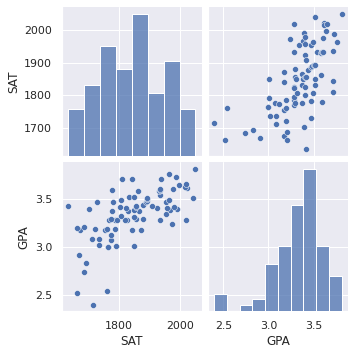

In [17]:
sns.pairplot(data)

In [18]:
#Change Yes=1 , and No = 0
data['Attendance']=data['Attendance'].map({'Yes':1,'No':0})
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


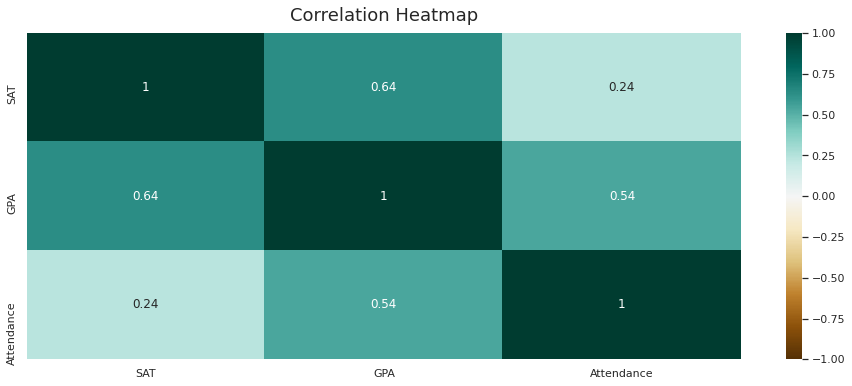

In [23]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [24]:
y=data['GPA']
x1=data[['SAT','Attendance']]

In [25]:
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           2.19e-15
Time:                        20:27:46   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

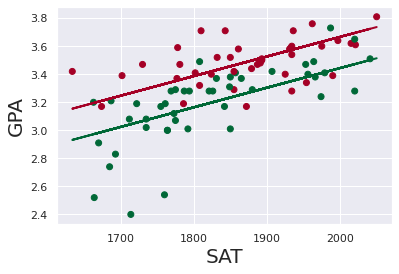

In [26]:
plt.scatter(data['SAT'],y,c=data['Attendance'],cmap='RdYlGn_r')
yHat_no=0.6439+0.0014*data['SAT']
yHat_yes=0.8665+0.0014*data['SAT']
fig=plt.plot(data['SAT'],yHat_no,lw=2,c='#006837')
fig=plt.plot(data['SAT'],yHat_yes,lw=2,c='#a50026')

plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

In [27]:
new_data=pd.DataFrame({'const':1,'SAT':[1700,1670],'Attendance':[0,1]})
new_data=new_data[['const','SAT','Attendance']]
new_data


,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [28]:
#Rename the index 0:Bob and 1:Alice
new_data.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [29]:
#The appropriate method that allow us to predict the values is the fitted regression dot predict
#The fitted regressions for us is variable results , results= sm.OLS(y,x).fit()
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [30]:
#I will transform into a data frame and join it with the first one
predictionsDataFrame=pd.DataFrame({'Predictions':predictions})
joined=new_data.join(predictionsDataFrame)
joined.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163
